In [10]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

# OS
import os

In [3]:
# Load CSV files:
stations_df = pd.read_csv('../data/bike_data.csv')
fsq_pois = pd.read_csv('../data/fsq_poi_counts.csv')
yelp_pois = pd.read_csv('../data/yelp_poi_totals.csv')

# Check shapes:
print(stations_df.shape)
print(fsq_pois.shape)
print(yelp_pois.shape)

(144, 5)
(144, 5)
(144, 1)


Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [4]:
# I noticed that the trail_poi_counts column is pretty consistently 0, so:
print("Unique value list: ", fsq_pois['trail_poi_counts'].unique())
print("Total unique values:", fsq_pois['trail_poi_counts'].nunique())
print("The following numbers appear:\n", fsq_pois['trail_poi_counts'].value_counts())

# There is only one single instance of a bike-accessible trail, so:
fsq_pois = fsq_pois.drop(columns=['trail_poi_counts'])

Unique value list:  [0 1]
Total unique values: 2
The following numbers appear:
 0    143
1      1
Name: trail_poi_counts, dtype: int64


In [19]:
# Join DataFrames:

poi_frames = [stations_df, fsq_pois, yelp_pois]
station_pois = pd.concat(poi_frames, axis=1)
# Create .csv:
station_pois.to_csv('../data/collective_stations_data.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

Starting with a rough overview of my EDA process:
1. My central goal is to see if there is a correlation between bike station placement and the number of POIs in their immediate surroundings (e.g. Is there a likelihood of there being a bike station within cycling distance of 10+ grocery stores?).
2. I was eager to make a stacked bar plot to compare different numbers of POIs based on different criteria, using FourSquare POI counts. 
3. However, the Yelp data was hard to work with due to their API having a hard cap of 50 requests per query. It is useful for providing a general indicator of POI density, but beyond that I am not sure how to work with it.

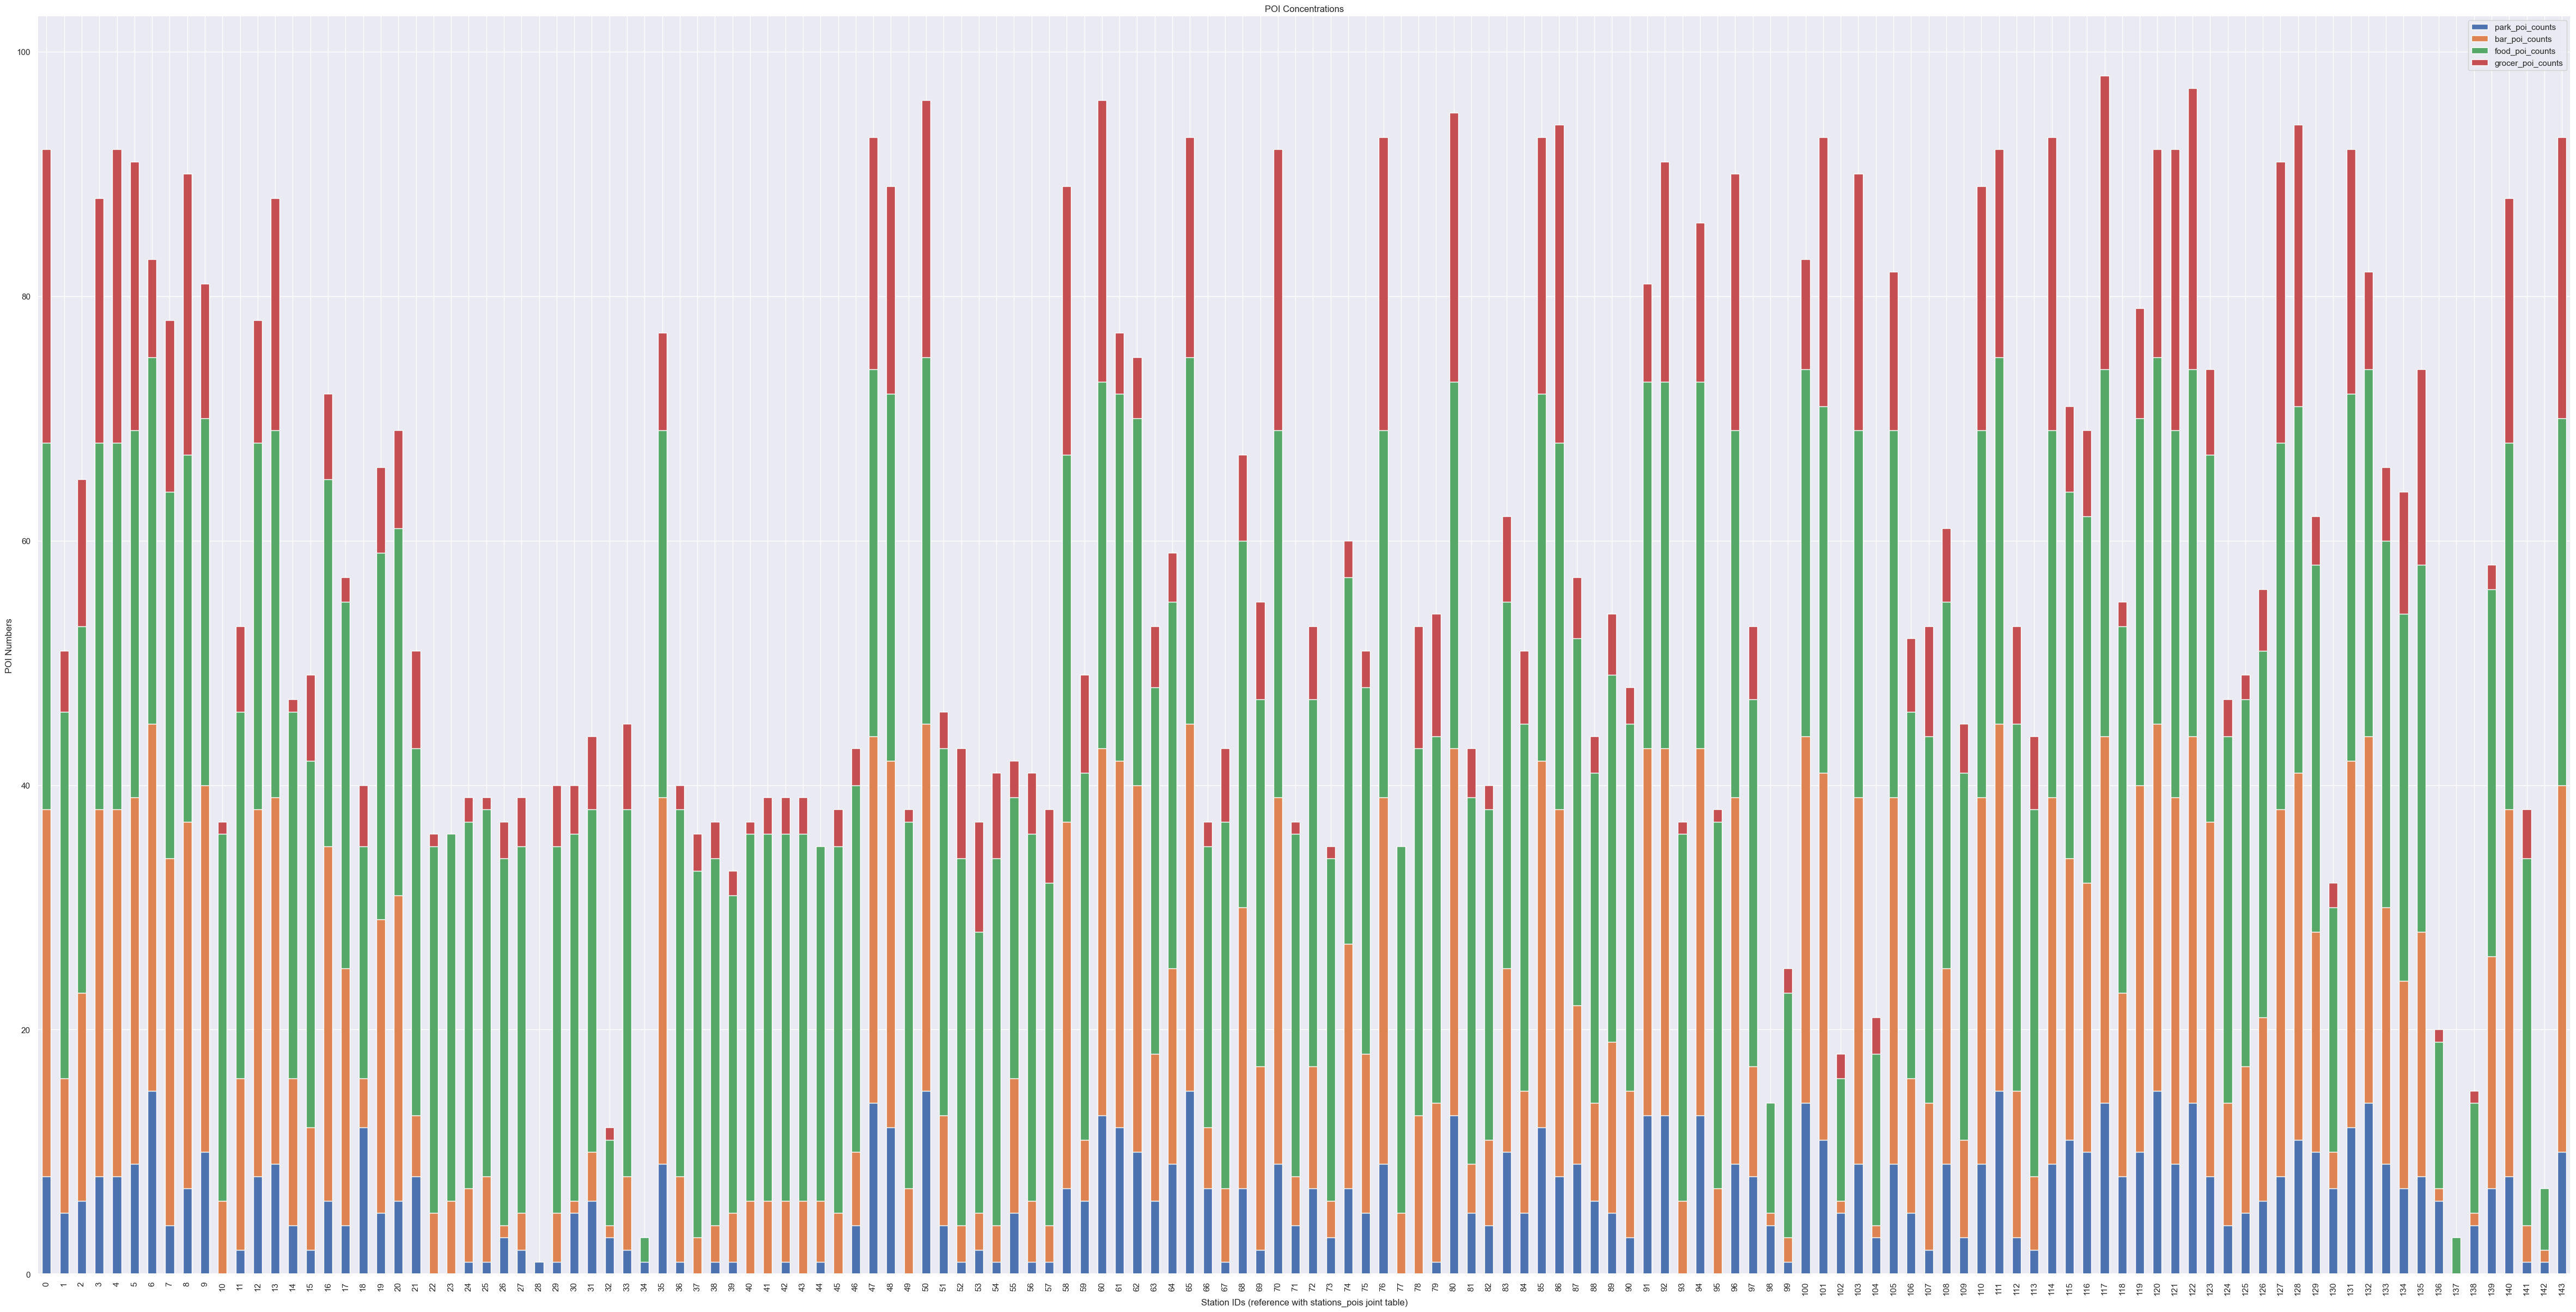

In [5]:
# Stacked bar char for four remaining POI categories:

fsq_pois.plot(kind='bar', stacked=True)
plt.xlabel('Station IDs (reference with stations_pois joint table)')  # e.g. #0 = hess at king
plt.ylabel('POI Numbers')
plt.title('POI Concentrations')
plt.gcf().set_size_inches(60,30)
plt.savefig('../images/joining_data - Visualisation Graph')

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [16]:
# SQL
import sqlite3
from sqlite3 import Error
import csv


def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [12]:
connection = create_connection("../data/project.sqlite")

Connection to SQLite DB successful


In [13]:
create_stations_table = """
CREATE TABLE IF NOT EXISTS stations (
  index_id INTEGER PRIMARY KEY AUTOINCREMENT,
  station_id TEXT,
  latitude NUMERIC NOT NULL,
  longitude NUMERIC NOT NULL,
  station_name TEXT,
  est_bike_slots INTEGER
);
"""

execute_query(connection, create_stations_table)

Query executed successfully


In [14]:
create_poi_groups_table = """
CREATE TABLE IF NOT EXISTS poi_groups (
  index_id INTEGER PRIMARY KEY AUTOINCREMENT,
  park_pois INTEGER,
  bar_pois INTEGER,
  food_pois INTEGER,
  grocer_pois INTEGER
);
"""

execute_query(connection, create_poi_groups_table)

Query executed successfully


In [15]:
create_yelp_totals_table = """
CREATE TABLE IF NOT EXISTS yelp_totals (
  index_id INTEGER PRIMARY KEY AUTOINCREMENT,
  yelp_counts INTEGER
);
"""

execute_query(connection, create_yelp_totals_table)

Query executed successfully


Look at the data before and after the join to validate your data.

In [ ]:
station_pois.head()